In [2]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [3]:
data_explore = pd.read_csv("../data/heart_train.csv")
data_explore.sample(10)

,Unnamed: 0,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
605,121,52,F,NAP,125,272,0,Normal,139,N,0.0,Up,0
479,27,52,M,ATA,120,284,0,Normal,118,N,0.0,Up,0
299,761,52,M,ASY,112,230,0,Normal,160,N,0.0,Up,1
370,817,60,M,ASY,125,258,0,LVH,141,Y,2.8,Flat,1
153,450,52,M,NAP,122,0,0,Normal,110,Y,2.0,Down,1
257,301,55,M,ATA,140,0,0,ST,150,N,0.2,Up,0
271,511,63,M,ASY,160,267,1,ST,88,Y,2.0,Flat,1
529,821,60,F,NAP,102,318,0,Normal,160,N,0.0,Up,0
97,692,39,F,NAP,94,199,0,Normal,179,N,0.0,Up,0
191,144,56,F,ATA,120,279,0,Normal,150,N,1.0,Flat,1


In [4]:
data_explore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      615 non-null    int64  
 1   Age             615 non-null    int64  
 2   Sex             615 non-null    object 
 3   ChestPainType   615 non-null    object 
 4   RestingBP       615 non-null    int64  
 5   Cholesterol     615 non-null    int64  
 6   FastingBS       615 non-null    int64  
 7   RestingECG      615 non-null    object 
 8   MaxHR           615 non-null    int64  
 9   ExerciseAngina  615 non-null    object 
 10  Oldpeak         615 non-null    float64
 11  ST_Slope        615 non-null    object 
 12  HeartDisease    615 non-null    int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 62.6+ KB


In [5]:
data_explore.duplicated().sum()

0

## Heart Disease

<Axes: xlabel='HeartDisease', ylabel='count'>

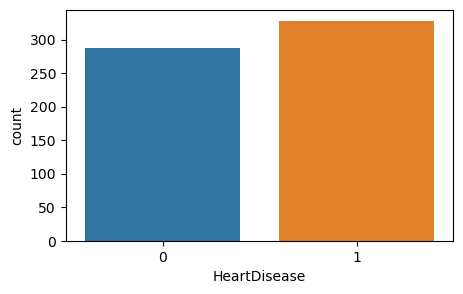

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(5,3))
sns.countplot(data=data_explore, x='HeartDisease', ax=ax)

## Age

<Axes: xlabel='Age', ylabel='Count'>

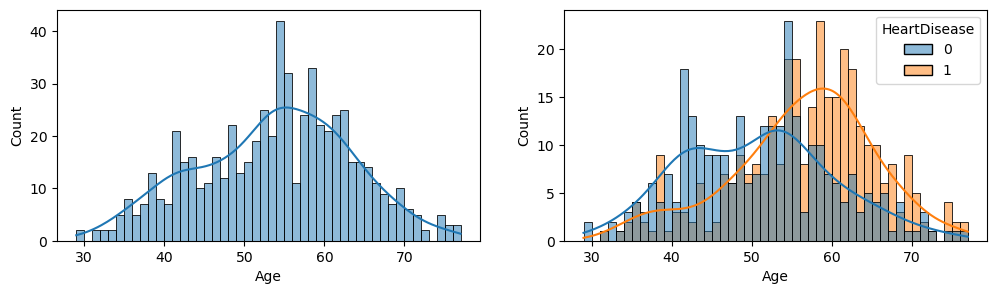

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(12,3))
sns.histplot(data=data_explore, x='Age', binwidth=1, kde=True, ax=ax[0])
sns.histplot(data=data_explore, x='Age', hue='HeartDisease', binwidth=1, kde=True, ax=ax[1])

<Axes: xlabel='Age', ylabel='Count'>

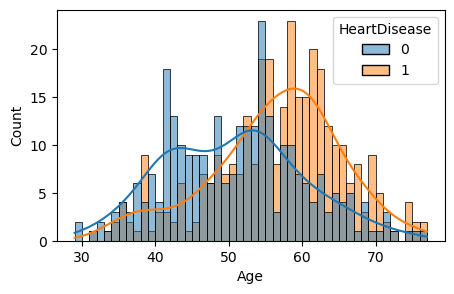

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(5,3))
sns.histplot(data=data_explore, x='Age', hue='HeartDisease', binwidth=1, kde=True, ax=ax)

## MaxHR

<Axes: xlabel='MaxHR', ylabel='Count'>

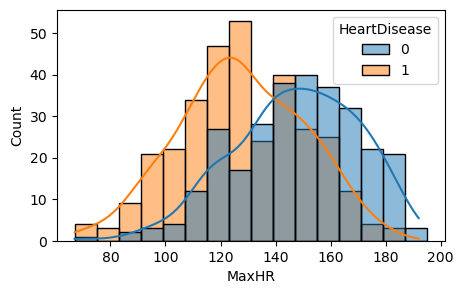

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(5,3))
sns.histplot(data=data_explore, x='MaxHR', hue='HeartDisease', binwidth=8, kde=True, ax=ax)

In [26]:
data_explore['MaxHR_Estiamte'] = 220 - data_explore['Age']
data_explore[['MaxHR_Estiamte', 'MaxHR', 'Age']].sample(10)


,MaxHR_Estiamte,MaxHR,Age
246,149,108,71
475,166,122,54
355,156,154,64
574,160,126,60
588,166,160,54
531,163,140,57
520,152,151,68
378,191,170,29
309,167,140,53
294,179,180,41


In [27]:
data_explore['MaxHR_Estiamte_Diff'] = abs(data_explore['MaxHR_Estiamte'] - data_explore['MaxHR'])

418    33
255    51
300    41
224     7
169    14
94     54
267    41
85     31
392    93
89     63
Name: MaxHR_Estiamte_Diff, dtype: int64

<Axes: xlabel='MaxHR_Estiamte_Diff', ylabel='Count'>

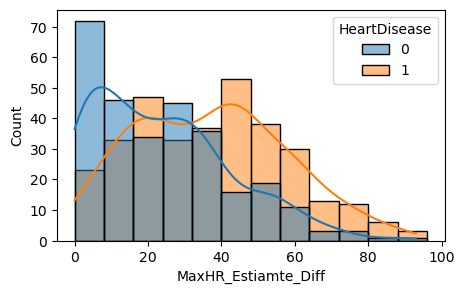

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(5,3))
sns.histplot(data=data_explore, x='MaxHR_Estiamte_Diff', hue='HeartDisease', binwidth=8, kde=True, ax=ax)

## Sex

<Axes: xlabel='Sex', ylabel='count'>

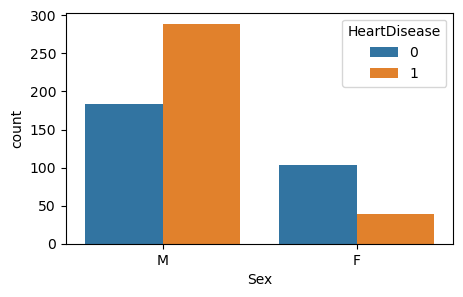

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(5,3))
sns.countplot(data=data_explore, x='Sex', hue='HeartDisease', ax=ax)

## ChestPainType

Note: Angina is chest pain due to reduced oxygen-rich blood flow to the heart. This commonly occurs during physical activity or emotional distress.  

- TA: Typical Angina is when the angina presents certain characteristics like pressure and tightness in the chest.
- ATA: Atypical Angina is when the agina does not present these common characteristics. Maybe the patient feels burning or stabbing. 
- NAP: Non-Anginal Pain is when there is chest pain that is not due to reduced blood flow to the heart. It's commonly NOT related to physical activity. 
- ASY: Asymptomatic in this case means they are not experiencing any chest pain. 

<Axes: xlabel='ChestPainType', ylabel='count'>

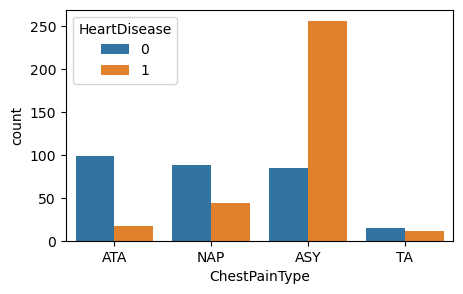

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(5,3))
sns.countplot(data=data_explore, x='ChestPainType', hue='HeartDisease', ax=ax)

## ExerciseAngina

<Axes: xlabel='ExerciseAngina', ylabel='count'>

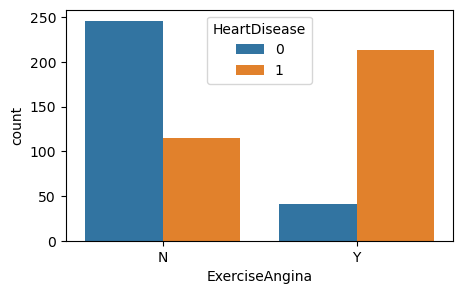

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(5,3))
sns.countplot(data=data_explore, x='ExerciseAngina', hue='HeartDisease', ax=ax)

## RestingBP (Blood Pressure)

Blood Pressures is...
This feature is measured in mm/HG

In [12]:
sum(data_explore['RestingBP'] == 0)

1

<Axes: xlabel='RestingBP', ylabel='Count'>

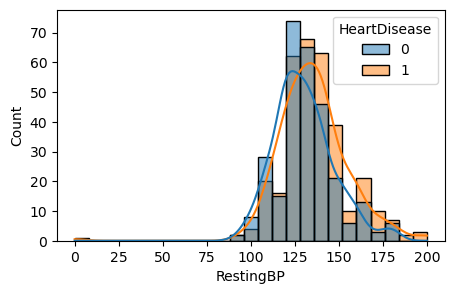

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(5,3))
sns.histplot(data=data_explore, x='RestingBP', hue='HeartDisease', binwidth=8, kde=True, ax=ax)

### Cholesterol
This is a measure of "serum cholesterol". 

Serum cholesterol represents the total amount of cholesterol in your blood. It's a combination of LDL and HDL cholesterol.  

In [14]:
sum(data_explore['Cholesterol'] == 0)

106

<Axes: xlabel='Cholesterol', ylabel='Count'>

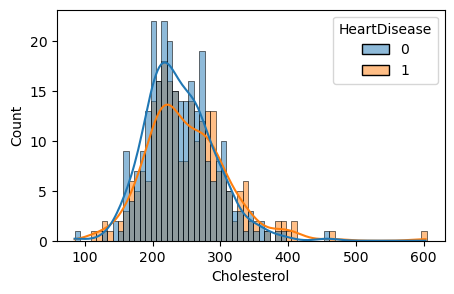

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(5,3))
sns.histplot(data=data_explore[data_explore['Cholesterol'] != 0], x='Cholesterol', hue='HeartDisease', binwidth=8, kde=True, ax=ax)

### FastingBS (Blood Sugar)

- 1: if FastingBS > 120 mg/dl
- 0: otherwise

<Axes: xlabel='FastingBS', ylabel='count'>

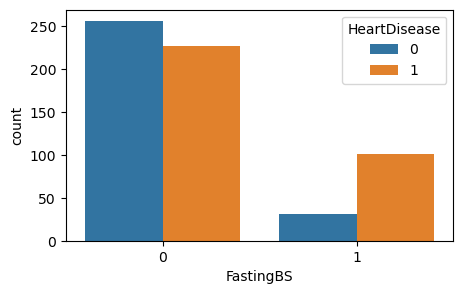

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(5,3))
sns.countplot(data=data_explore, x='FastingBS', hue='HeartDisease', ax=ax)

### RestingECG (Electrocardiogram)
- Normal: Normal
- ST: having ST Segment and/or T Wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria



##### Healthy ST-Segment and T-Wave  
This images show what these should normally look like.  
<img src="images/ST-Segment.png" alt="ST-Segment.png" width="250"/>
<img src="images/T-Wave.png" alt="T-Wave.png" width="250"/>  

**Abnormal ST-Segment**  
<img src="images/ST-Segment-Abnormal.png" alt="ST-Segment-Abnormal.png" width="500"/>  

**Abnormal T-Wave**  
<img src="images/T-Wave-Abnormal.png" alt="T-Wave-Abnormal" width="500"/>  

*All Pictures taken from here: https://app.pulsenotes.com/clinical/ecgs/notes/8-st-segment-t-waves*

<Axes: xlabel='RestingECG', ylabel='count'>

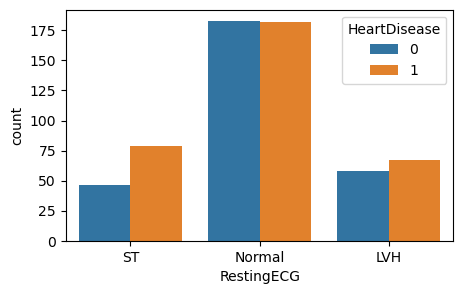

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(5,3))
sns.countplot(data=data_explore, x='RestingECG', hue='HeartDisease', ax=ax)

## Oldpeak

In [18]:
data_explore['Oldpeak'].describe()

count    615.000000
mean       0.917724
std        1.110827
min       -2.600000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: Oldpeak, dtype: float64

<Axes: xlabel='Oldpeak', ylabel='Count'>

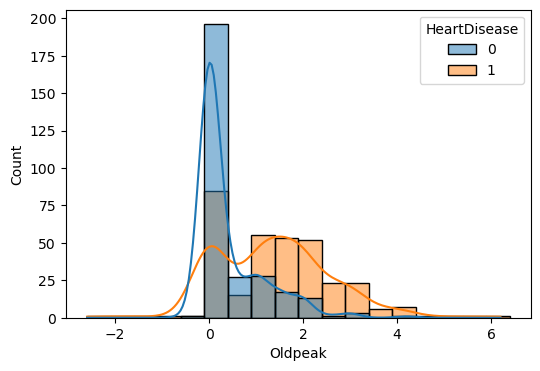

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
sns.histplot(data=data_explore, x='Oldpeak', hue='HeartDisease', binwidth=0.5, kde=True, ax=ax)

### ST_Slope
the slope of the peak exercise ST segment 
- Up: upsloping
- Flat: flat, Down: downsloping

<Axes: xlabel='ST_Slope', ylabel='count'>

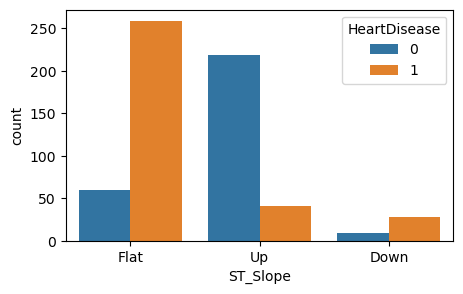

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(5,3))
sns.countplot(data=data_explore, x='ST_Slope', hue='HeartDisease', ax=ax)